In [53]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
csv_filename = ""
if csv_filename:
    df = pd.read_csv()
else:
    list_of_files = glob.glob('stats/*')
    latest_csv = max(list_of_files, key=os.path.getctime)
    df = pd.read_csv(latest_csv)
df.head()

,name,optim,size,time
0,naive,0,5,0.000002
1,naive,0,5,0.000002
2,naive,0,5,0.000001
3,naive,0,5,0.000002
4,naive,0,5,0.000003


In [55]:
def create_scatter_subplot(ax, data, optims, name, scale="linear"):
    for optim in optims:
        optim_data = data[data[:,1] == optim]
        x = np.array(optim_data[:,2], dtype=np.float32) # Get matrix sizes
        y = np.array(optim_data[:,3], dtype=np.float32) # Get execution time
        if scale == "log":
            plt.yscale("log")
        ax.scatter(x, y, label=f"-O{optim}")
        ax.legend(loc="upper left")
        ax.set_ylabel("Seconds")
        ax.set_xlabel("Matrix size")
        ax.title.set_text(name)

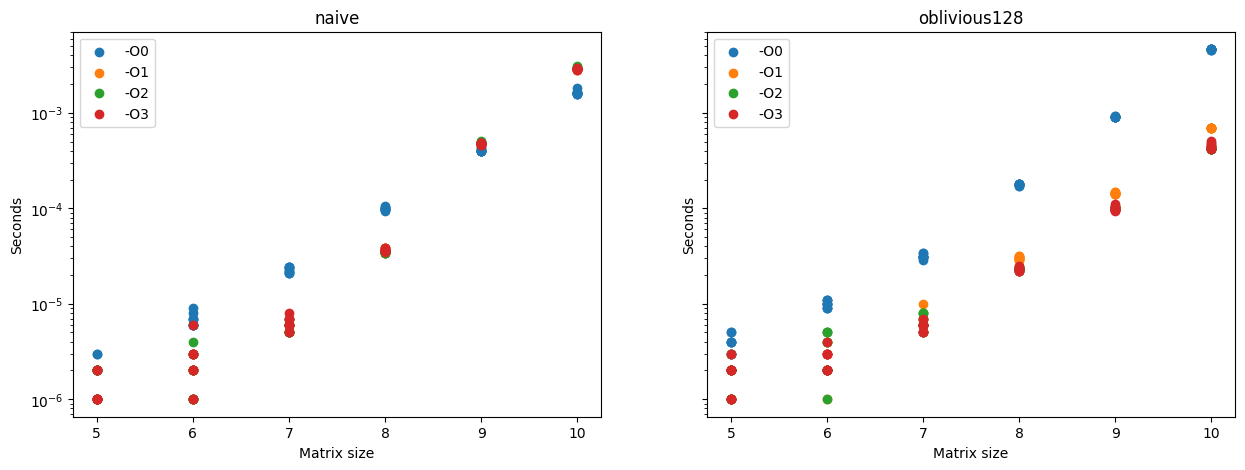

In [56]:
optims = df["optim"].unique()
names = df["name"].unique()

fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

for i, name in enumerate(names):
    data = df[df["name"] == name].to_numpy()
    create_scatter_subplot(ax[i], data, optims, name, scale="log")
plt.show()

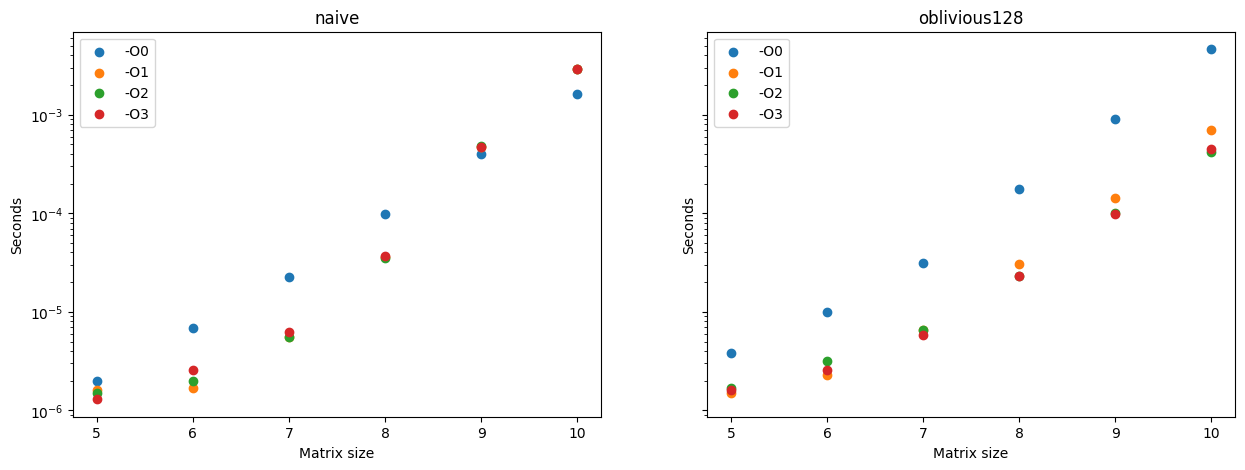

In [57]:
fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

means = df.groupby(['name', 'optim', 'size']).mean()
for i, name in enumerate(names):
    for optim in optims:
        datapoints = means.loc[name, optim]
        x = list(datapoints.index)
        y = list(datapoints['time'])
        plt.yscale("log")
        ax[i].scatter(x, y, label=f"-O{optim}")
        ax[i].legend(loc="upper left")
        ax[i].set_ylabel("Seconds")
        ax[i].set_xlabel("Matrix size")
        ax[i].title.set_text(name)
plt.show()

In [58]:
means.loc['oblivious128', 3], means.loc['naive', 3]

(          time
 size          
 5     0.000002
 6     0.000003
 7     0.000006
 8     0.000023
 9     0.000099
 10    0.000451,
           time
 size          
 5     0.000001
 6     0.000003
 7     0.000006
 8     0.000037
 9     0.000474
 10    0.002879)